## Introduction to Data Science

#### University of Redlands - DATA 101
#### Prof: Joanna Bieri [joanna_bieri@redlands.edu](mailto:joanna_bieri@redlands.edu)
#### [Class Website: data101.joannabieri.com](https://joannabieri.com/data101.html)

---------------------------------------
# Homework Day 15
---------------------------------------

GOALS:

1. Practice making plots
2. Add trendlines to plots
3. Explore Linear Regression

----------------------------------------------------------

This homework has **4 questions** and **3 exercises**.


## Help with Algorithms!

Implementing algorithms can be very difficult. I would highly suggest that you **start by recreating the code that you see in the lecture**... copy and paste it and make sure it runs. THEN try to alter that code to do the exercises.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.defaule = 'colab'

from itables import show

# This stops a few warning messages from showing
pd.options.mode.chained_assignment = None 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
# Load the Data
file_location = 'https://joannabieri.com/introdatascience/data/paris-paintings.csv'
DF_raw_paintings = pd.read_csv(file_location,na_filter=False)

In [4]:
show(DF_raw_paintings)

In [7]:
# Make a copy of the data that we can start working on
DF = DF_raw_paintings.copy()

# Do something about all those different NaNs
DF.replace('',np.nan,inplace=True)
DF.replace('n/a',np.nan,inplace=True)
DF.replace('NaN',np.nan,inplace=True)

**Q1** Make historgrams of the height and width of all the paintings in the data set. You should be able to recreate the plots from the lecture without looking at the code.

Don't forget to change the values into floats liek we did in the lecture!

In [11]:
# Look at the data types in these columns
my_cols = ['Height_in', 'Width_in']
DF[my_cols].dtypes

Height_in    object
Width_in     object
dtype: object

In [17]:
# Update the types - these should be floats
DF['Height_in'] = DF['Height_in'].apply(lambda x: float(x))
DF['Width_in'] = DF['Width_in'].apply(lambda x: float(x))
DFdim = DF[my_cols]


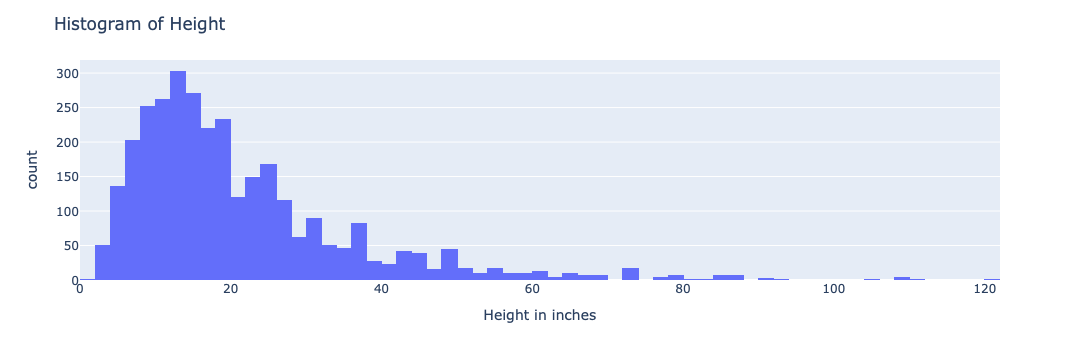

In [35]:
fig = px.histogram(DFdim,
                   x = 'Height_in',
                   nbins = 100)

fig.update_layout(bargap = 0,
                  title = "Histogram of Height",
                  xaxis_title = "Height in inches")
                  
                   

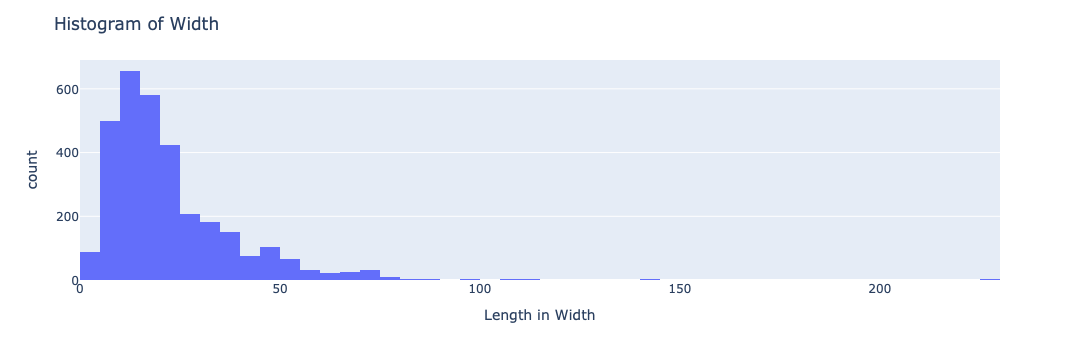

In [39]:
fig = px.histogram(DFdim,
                   x = 'Width_in',
                   nbins = 100)

fig.update_layout(bargap = 0,
                  title = "Histogram of Width",
                  xaxis_title = "Width in Width")
                  
                   

**Q2** Explain in words what these plots tell you about the data.

    This data tells that the majority of the paintings lie within the range of 40 inches in height and 50 inches in length, and the paintings are generally taller than they are wide.


**Q3** Make a scatter plot of the width vs the height like the one in the lecture. You should be able to recreate the plots here without looking at the code.

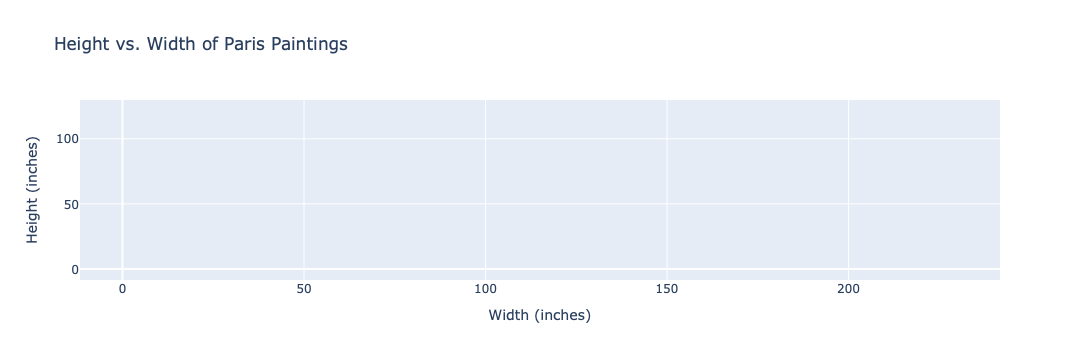

In [42]:
fig = px.scatter(DFdim,
                 x = 'Width_in',
                 y = 'Height_in',
                 title = "Height vs. Width of Paris Paintings")
fig.update_layout(xaxis_title = "Width (inches)",
                  yaxis_title = "Height (inches)")

The plot below uses Ordinary Least Squares fitting to find a reasonable line.

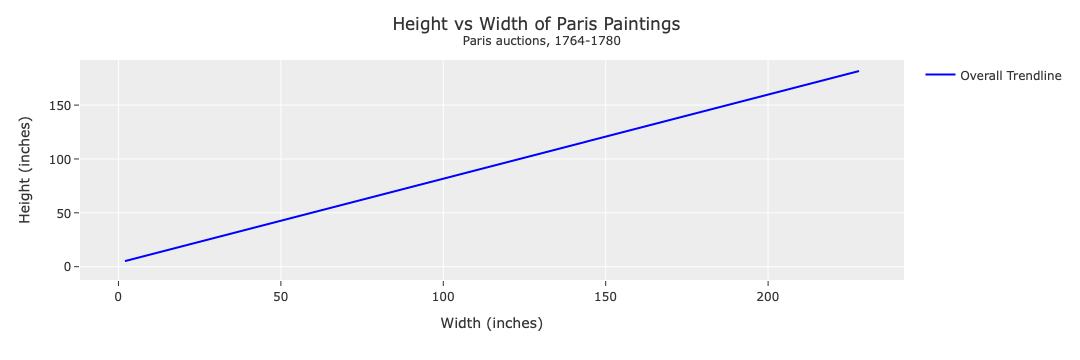

In [45]:
# Example Code Trendline

DF['Height_in'] = DF['Height_in'].apply(lambda x: float(x))
DF['Width_in'] = DF['Width_in'].apply(lambda x: float(x))

fig = px.scatter(DF,
                 x='Width_in',
                 y="Height_in",
                 color_discrete_sequence=['black'],
                trendline='ols',
                trendline_scope='overall',
                trendline_color_override='blue')


fig.update_layout(template="ggplot2",
                  title='Height vs Width of Paris Paintings <br><sup> Paris auctions, 1764-1780</sup>',
                  title_x=0.5,
                  xaxis_title="Width (inches)",
                  yaxis_title="Height (inches)")

fig.show()

So the line that "fits" this data based on the code we ran is

$$ H = 0.7808 W + 3.6214 $$

**Q4** Where do we think this prediction is most accurate? Where is there the most error? Explain why you think this?

    This prediction is likely the most accurate towards the lower end of the spectrum as the majority of the lengths lie in that area, meaning the most error would lie in the larger lengths.  

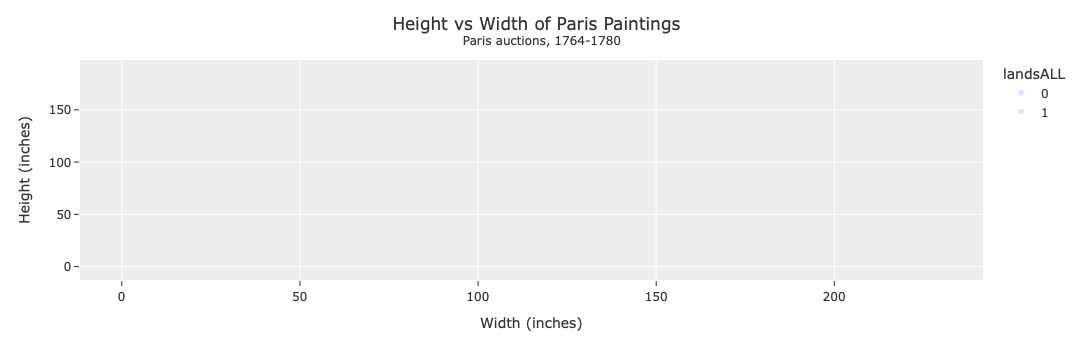

In [57]:
# Example Code Trendline with Categories
DF['landsALL'] = DF['landsALL'].apply(lambda x: str(x))

fig = px.scatter(DF,
                 x='Width_in',
                 y="Height_in",
                 color='landsALL',
                 opacity=0.2,
                 trendline='ols')

fig.update_layout(template="ggplot2",
                  title='Height vs Width of Paris Paintings <br><sup> Paris auctions, 1764-1780</sup>',
                  title_x=0.5,
                  xaxis_title="Width (inches)",
                  yaxis_title="Height (inches)")

fig.show()

IN the plot above we added another variable by coloring by whether or not there were landscape features in the painting. Then the trendline='ols' now gives us two lines. Here there is some evidence that if a painting in landscape, then it tends to be wider than it is tall.

**Exercise 1** Redo the plot above except color by some other variable that takes values of zero or one. Describe what the ols trendline tells you about the height and width of that type of painting. Eg. Does a painting being described as pastoral mean it is taller or wider than if it is not pastoral?

1. Choose a column that has just 0 and 1 as entries
2. Change those values into strings using apply and lambda
3. Do a value counts and talk about the balance in the data
4. Create a scatter plot with an old trendline colored by your focal column
5. Describe in words what you plot is telling you.

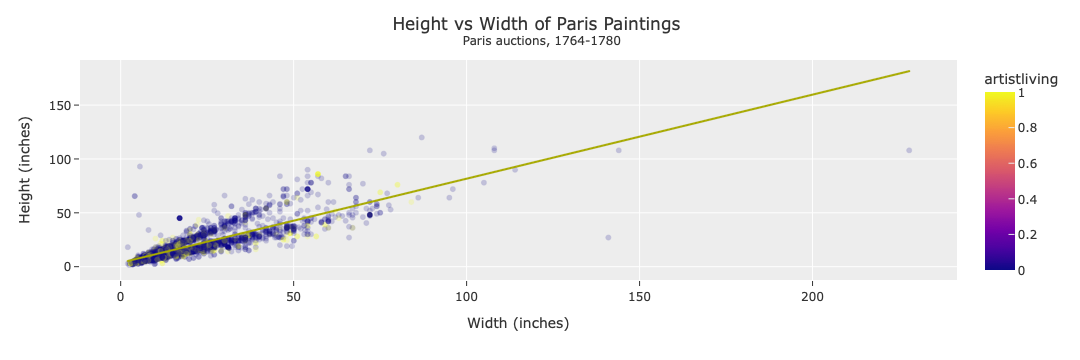

In [59]:


fig = px.scatter(DF,
                 x='Width_in',
                 y="Height_in",
                 color='artistliving',
                 opacity=0.2,
                 trendline='ols')

fig.update_layout(template="ggplot2",
                  title='Height vs Width of Paris Paintings <br><sup> Paris auctions, 1764-1780</sup>',
                  title_x=0.5,
                  xaxis_title="Width (inches)",
                  yaxis_title="Height (inches)")

fig.show()

According to the coloring, there is not much correlation between the dead and alive artists and the size of their paintings, however all of the larger paintings that appear as outliers are all by dead artists.

In [65]:
DF['artistliving'].astype('string')
DF['artistliving'].value_counts()

artistliving
0    2937
1     456
Name: count, dtype: int64

According to this, 86.6% of the artists are no longer alive.


## Install Scikit-Learn

Run the code below to install sklearn.

```{python}
    !conda install -y scikit-learn
```

In [52]:
!conda install -y scikit-learn

Retrieving notices: ...working... done
Channels:
 - conda-forge
 - defaults
Platform: osx-arm64
Solving environment: done

## Package Plan ##

  environment location: /opt/anaconda3

  added / updated specs:
    - scikit-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-24.9.2               |  py312h81bd7bf_0         1.1 MB  conda-forge
    llvm-openmp-19.1.3         |       hb52a8e5_0         274 KB  conda-forge
    openssl-3.4.0              |       h39f12f2_0         2.8 MB  conda-forge
    scikit-learn-1.5.2         |  py312h387f99c_1         9.1 MB  conda-forge
    threadpoolctl-3.5.0        |     pyhc1e730c_0          23 KB  conda-forge
    ------------------------------------------------------------
                                           Total:        13.3 MB

The following packages will be UPDATED:

  conda                              24.9.1-py312h81bd7bf_0 --> 2

In [69]:
# A new packages to import!
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import OneHotEncoder

**Exercise 2** Redo the Linear Regression from the lecture to see if you can use the size ('Surface') of the painting to predict the price.

1. Create a data frame with only the price and surface columns
2. Look at the data types
3. Preprocess the data - remove NaNs and change the Surface values to floats.
5. Train a linear regression model that takes as an input X = Surface Area and gives as an output y=price

           X = DF_model['Surface'].values.reshape(-1,1)
           y = DF_model['price'].values
7. Plot a scatter plot of Price vs Surface add in your predicted line
8. Find your slope and intercept
9. Look at the score

Interpret your results. Should you use a linear model to predict the price of a painting using the surface area?

*In the lecture you can see the scatter plot and score that I got.*


### Preprocessing the Data

Before you can build a model you need to do some cleaning and preprocessing of your data. Here are some important steps:

1. Select the variables that you wan to use (columns)
2. Decide what to do about NaNs or other strange data
3. (*advanced*) Think about rescaling and standardizing
4. Create the inputs and outputs (sometimes encode)
5. (*advanced*) Test - Train split

### Train the model

1. Create the base model, in this case LinearRegression()
2. Train the model using the training data
3. Look at the results.


In [115]:
mycolumns = ['price', 'Surface']
DFnew = DF[mycolumns]
DFnew

,price,Surface
0,360.0,1091.5
1,6.0,252
2,12.0,208
3,6.0,252
4,6.0,252
...,...,...
3388,18.0,387
3389,25.0,214.5
3390,80.0,720
3391,5.0,621


In [117]:
DFnew.dtypes

price      float64
Surface     object
dtype: object

In [144]:
DFnew['Surface'] = DFnew['Surface'].astype(float)
DFnew = DFnew.dropna()
DFnew

,price,Surface
0,360.0,1091.5
1,6.0,252.0
2,12.0,208.0
3,6.0,252.0
4,6.0,252.0
...,...,...
3388,18.0,387.0
3389,25.0,214.5
3390,80.0,720.0
3391,5.0,621.0


In [146]:
X = DFnew['Surface'].values.reshape(-1,1)
y = DFnew['price'].values

In [148]:
# Create linear regression object - a random straight line
LM = LinearRegression()

# Train the model using the data
LM.fit(X, y)

LinearRegression()

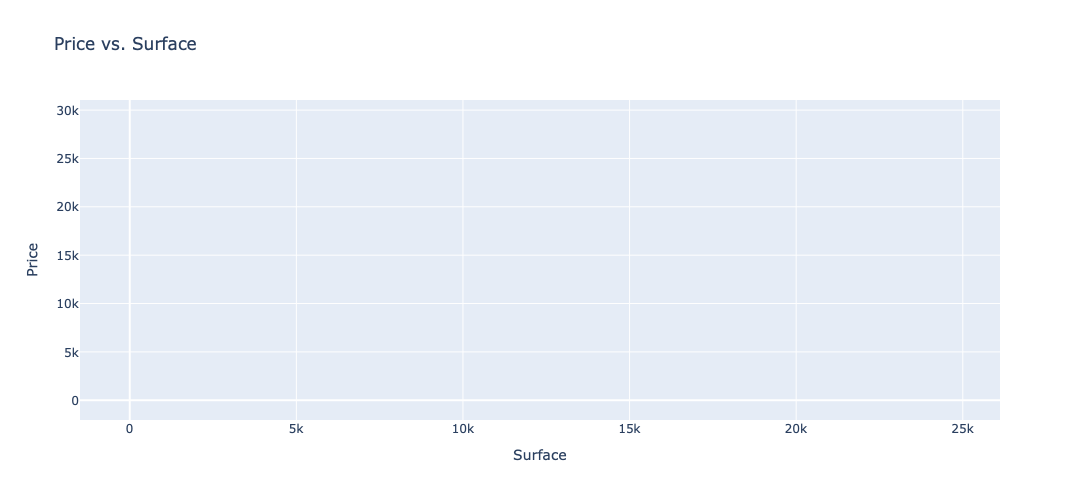

In [163]:
fig = px.scatter(DFnew,
                 x = 'Surface',
                 y = 'price',
                 title = "Price vs. Surface")

fig.update_layout(yaxis_title = "Price",
                  height = 500,
                  width = 750)

DFnew['w'] = DFnew['Surface']
DFnew['y'] = LM.coef_*DFnew['w']+LM.intercept_
DFnew = DFnew.sort_values('w')

fig.add_trace(
    px.line(DFnew, x='w', y='y',color_discrete_sequence=['blue']).data[0]
)

fig.show()

In [165]:
# The coefficient is the slope
LM.coef_

array([0.1876263])

In [167]:
# We can also see the intercept
LM.intercept_

660.1215276728364

In [170]:
LM.score(X, y)

0.011141075251450583

The accuracy for this model is quite low, so using a linear regression for this set of data may not be the best model.

**Exercise 3** Redo the analysis for Linear Regression with more than one categorical value (from the lecture) except this time see if the school of the painting effects the overall size ('Surface') of the painting. Don't forget to drop the NaNs where we don't know the surface size and change the surface variables to floats.

1. Create a data frame with only the school and surface columns
2. Look at the data types
3. Preprocess the data - remove NaNs and change the Surface values to floats.
5. Train a linear regression model that takes as an input X = School and gives as an output y= surface area, now you need to one hot encode the X values!

           X = DF_model['school_pntg'].values.reshape(-1,1)
           y = DF_model['Surface'].values
   
9. Look at the output, what does it mean?
        - Which school of paintings on average are largest? smallest?

*You can see the outputs of my code in the lecture*


In [175]:
mycol = ['school_pntg', 'Surface']
DF3 = DF[mycol]
DF3

,school_pntg,Surface
0,F,1091.5
1,I,252
2,D/FL,208
3,F,252
4,F,252
...,...,...
3388,F,387
3389,F,214.5
3390,F,720
3391,F,621


In [181]:
DF3 = DF3.dropna()
DF3.dtypes

school_pntg    object
Surface        object
dtype: object

In [195]:
DF3['Surface'] = DF3['Surface'].astype(float)
DF_model = DF3

In [199]:
# Get the data we want to predict
X = DF_model['school_pntg'].values.reshape(-1,1)
y = DF_model['Surface'].values

# Now because X has lots of categories, we need to encode it:
encoder = OneHotEncoder()
X = encoder.fit_transform(X)

In [201]:
categories = encoder.categories_[0]
categories

array(['A', 'D/FL', 'F', 'G', 'I', 'S', 'X'], dtype=object)

In [203]:
# Look at each category and encoding
result = DF_model.groupby('school_pntg',as_index=False).first()
encoded_data = encoder.transform(result['school_pntg'].values.reshape(-1,1))



for i,e in enumerate(encoded_data.toarray()):
    print(categories[i])
    print(e)
    print('---------------------------')

A
[1. 0. 0. 0. 0. 0. 0.]
---------------------------
D/FL
[0. 1. 0. 0. 0. 0. 0.]
---------------------------
F
[0. 0. 1. 0. 0. 0. 0.]
---------------------------
G
[0. 0. 0. 1. 0. 0. 0.]
---------------------------
I
[0. 0. 0. 0. 1. 0. 0.]
---------------------------
S
[0. 0. 0. 0. 0. 1. 0.]
---------------------------
X
[0. 0. 0. 0. 0. 0. 1.]
---------------------------


In [205]:
# Create linear regression object - a random straight line
LM = LinearRegression()

# Train the model using the data
LM.fit(X, y)


# Look at the information we get
print(LM.coef_)
print('------------------------------')
print(LM.intercept_)

[-392.0740555  -266.70349531  122.28773892 -393.21155589  142.65081905
 1051.64022988 -264.58968116]
------------------------------
686.0740429004898


By this data, the school whos artwork are on average the largest in surface area is Spain, and the school whos artwork are on average the smallest is Italy.